In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 
plt.style.use(['science', 'no-latex'])

#### Normalización Estándar 

Hacemos una transformación en mis datos

$$ x_{norm} = \frac{x -\mu}{\sigma} $$

Siempre y cuando se estudie cual es el efecto que tiene la normalización en mis datos

In [3]:
data = np.loadtxt('../Data/olympic100m_men.txt', delimiter=',').T

x = data[0]
y = data[1]

x_normal = (x-np.mean(x))/np.std(x)



In [5]:
def gradiente_descendent(x, y, iterations, learning_rate, tolerance, degree = 1):
     
    datax = [x**(i) for i in range(degree+1)]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.random.uniform(-10.0, 10.0, size=degree+1)
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        #Actualizamos w
        
        
        
        current_w = current_w - learning_rate*gradient
    

    return current_w



In [41]:
def gradiente_descendent(x, y, iterations, w0, learning_rate, tolerance, degree = 1):
     
    datax = [x**(i) for i in range(degree+1)]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.array(w0)
    cost_array = np.array([])
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if (i%1000 == 1000):
            print(f'Iteration {i}  w:{current_w}')
        
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        
        #Actualizamos w
        current_w = current_w - learning_rate*gradient
        
        cost_array  = np.append(np.sum((X @ current_w - y)**2), cost_array)
    

    return cost_array, current_w



In [43]:
cost, w_n1 = gradiente_descendent(x_normal, y, 10000, [11, 0], 1e-2, 1e-4, 1)

x_aux = np.linspace(np.min(x_normal), np.max(x_normal), 250)


Convergio en 410 iteraciones. 


array([ 1.3624927 ,  1.36257799,  1.36266502,  1.36275381,  1.3628444 ,
        1.36293683,  1.36303114,  1.36312737,  1.36322554,  1.36332571,
        1.36342792,  1.3635322 ,  1.3636386 ,  1.36374716,  1.36385792,
        1.36397093,  1.36408623,  1.36420388,  1.36432392,  1.36444639,
        1.36457135,  1.36469885,  1.36482893,  1.36496166,  1.36509708,
        1.36523525,  1.36537623,  1.36552006,  1.36566682,  1.36581656,
        1.36596934,  1.36612522,  1.36628427,  1.36644655,  1.36661212,
        1.36678105,  1.36695341,  1.36712927,  1.36730871,  1.36749178,
        1.36767858,  1.36786916,  1.36806362,  1.36826202,  1.36846445,
        1.368671  ,  1.36888173,  1.36909675,  1.36931613,  1.36953996,
        1.36976834,  1.37000136,  1.37023911,  1.37048168,  1.37072918,
        1.37098171,  1.37123936,  1.37150224,  1.37177047,  1.37204413,
        1.37232336,  1.37260825,  1.37289893,  1.37319551,  1.37349811,
        1.37380686,  1.37412187,  1.37444328,  1.37477122,  1.37

In [8]:
def poly(x, weights):
    
    y_p = 0
    for i in range(len(weights)):
        y_p += weights[i]*x**(i)
        
    return y_p 

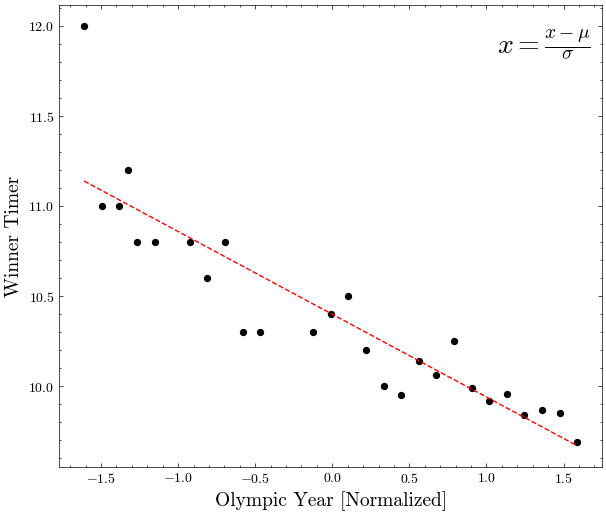

In [59]:
fig = plt.figure(figsize=(7, 6))
plt.scatter(x_normal, y, color = 'black', s=18)
plt.plot(x_aux, poly(x_aux, w_n1), 'r--')
plt.xlabel('Olympic Year [Normalized]', fontsize = 14)
plt.ylabel('Winner Timer', fontsize = 14)
fig.text(.75, 0.8, r'$x = \frac{x - \mu}{\sigma}$ ', fontsize = 20);

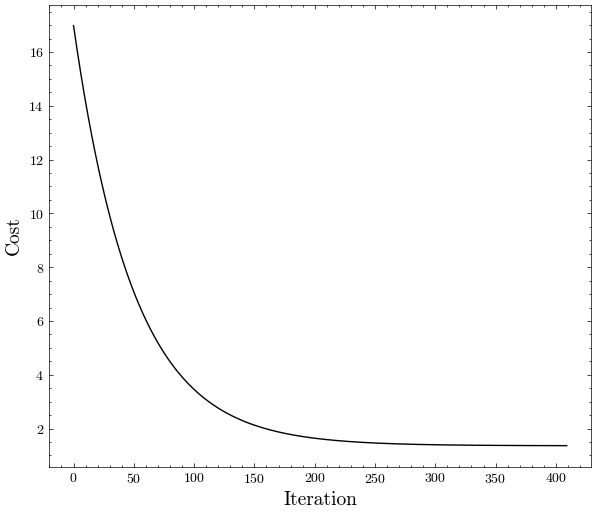

In [49]:
fig = plt.figure(figsize=(7, 6))
plt.plot(cost[::-1], color = 'black')
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Cost', fontsize = 14);

# Ejercicio Clase

Para el conjunto de datos adjunto, las columnas corresponden a Tamaño de la casa, número de habitaciones, número de pisos, años de antigüedad y costo. 

- Para dicho conjunto de datos realizar lo siguiente
- Explorar los datos, realiza gráficas del costo de las casas como función de cada característica. 
- Ajustar un modelo lineal usando todas las características, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso. 
- Normaliza las características y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje. 
- Usa el modelo obtenido para predecir el valor de una casa con las siguientes características 


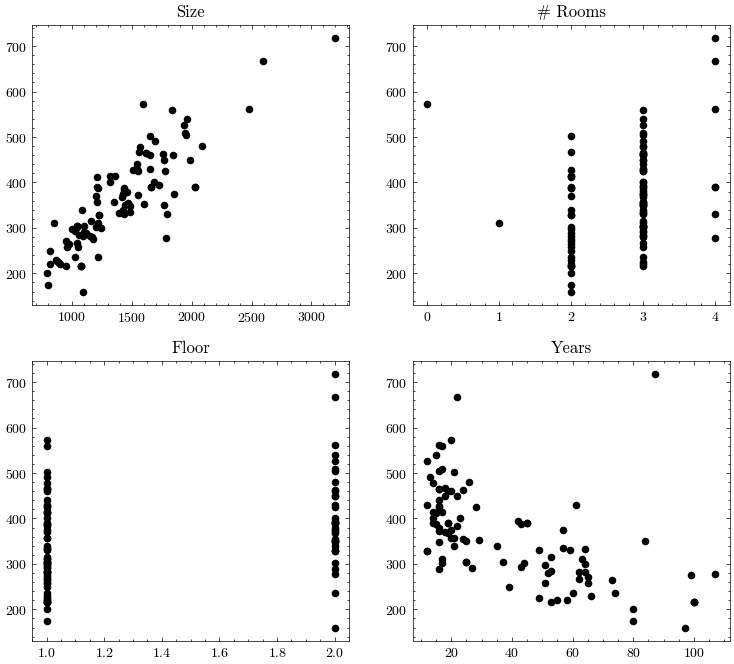

In [80]:
data_houses = np.loadtxt('../Data/houses.txt', delimiter=',').T

xh = data_houses[0:4]
th = data_houses[-1]

fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)

ax[0,0].scatter(xh[0], th, s=20, color='black')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], th, s=20, color='black')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], th, s=20, color='black')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], th, s=20, color='black')
ax[1,1].set_title('Years');

$$ f(x; w) = \frac{1}{2 N} \sum_{i} \left(  w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 -t \right)^2 $$

Iteration 0  w:[0 0 0 0 0]
Iteration 20000  w:[1.11390904e-04 1.67477750e-01 3.04302061e-04 1.55864774e-04
 3.67344132e-03]
Iteration 40000  w:[1.50492639e-04 2.24080511e-01 4.05008783e-04 2.05822078e-04
 4.69900218e-03]
Iteration 60000  w:[1.65165425e-04 2.43214063e-01 4.36913228e-04 2.19989052e-04
 4.82983517e-03]
Iteration 80000  w:[1.71583194e-04 2.49685231e-01 4.45567499e-04 2.22061153e-04
 4.65840239e-03]
Iteration 100000  w:[1.75211782e-04 2.51877258e-01 4.46365519e-04 2.20046050e-04
 4.38492104e-03]
Iteration 120000  w:[1.77898317e-04 2.52623185e-01 4.44509527e-04 2.16649860e-04
 4.07705269e-03]
Iteration 140000  w:[1.80267021e-04 2.52880412e-01 4.41757570e-04 2.12787093e-04
 3.75766290e-03]
Iteration 160000  w:[1.82528843e-04 2.52972487e-01 4.38703766e-04 2.08766797e-04
 3.43447883e-03]
Iteration 180000  w:[1.84755070e-04 2.53008746e-01 4.35548890e-04 2.04693415e-04
 3.11011178e-03]


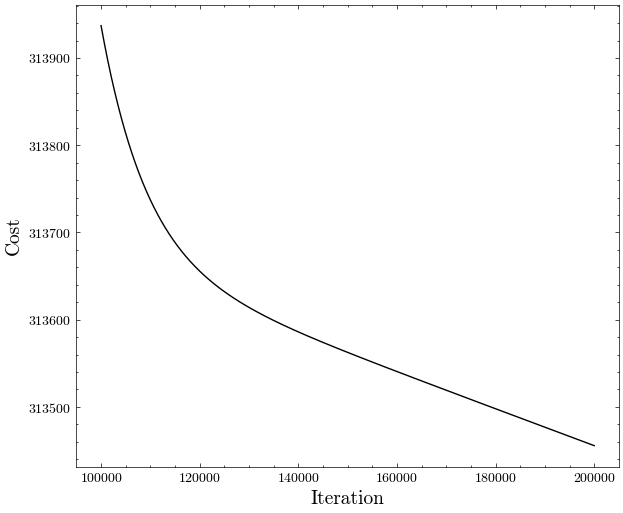

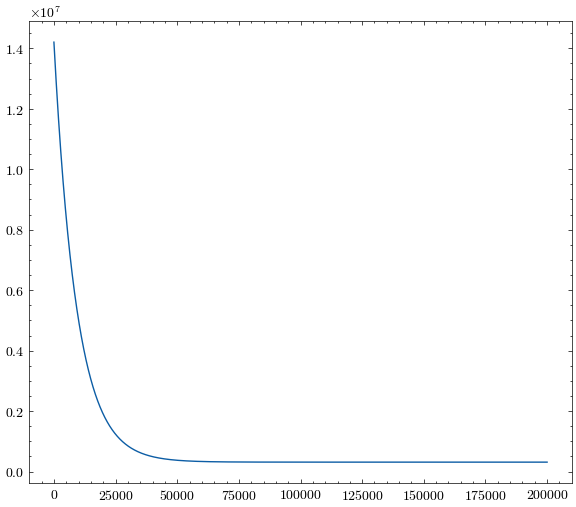

In [160]:
def gradiente_descendent(x, y, iterations, w0, learning_rate, tolerance):
     
    datax = [np.ones_like(xh[0]), xh[0], xh[1], xh[2], xh[3]]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.array(w0)
    cost_array = np.array([])
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if (i%20000 == 0):
            print(f'Iteration {i}  w:{current_w}')
        
        
        if np.all(np.abs(learning_rate*gradient) < tolerance):
            #Salimos del ciclo
            print(f'Convergio en {i} iteraciones. ')
            break
        
        #Actualizamos w
        current_w = current_w - learning_rate*gradient
        
        cost_array  = np.append(np.sum((X @ current_w - y)**2), cost_array)
    

    return cost_array, current_w

iterations = 200000


cost, w_h = gradiente_descendent(xh, th, iterations, [0, 0, 0, 0, 0], 1e-12, 1e-15)
fig = plt.figure(figsize=(7, 6))
plt.plot(np.arange(100001, iterations, 1), cost[::-1][100000:iterations-1], color = 'black')
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Cost', fontsize = 14);
plt.show()
fig = plt.figure(figsize=(7, 6))
plt.plot(cost[::-1])

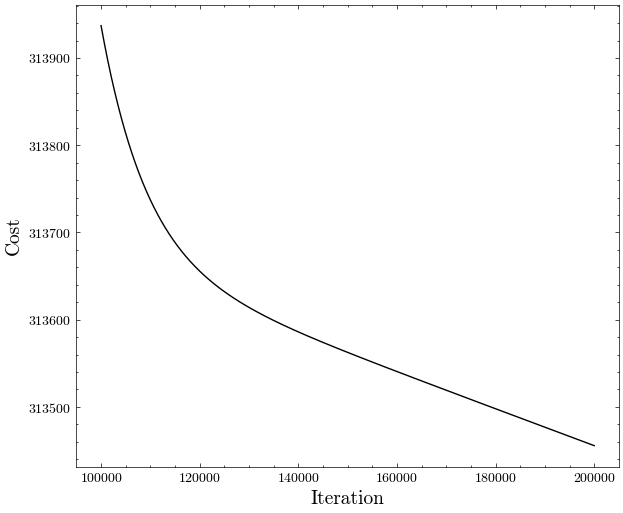

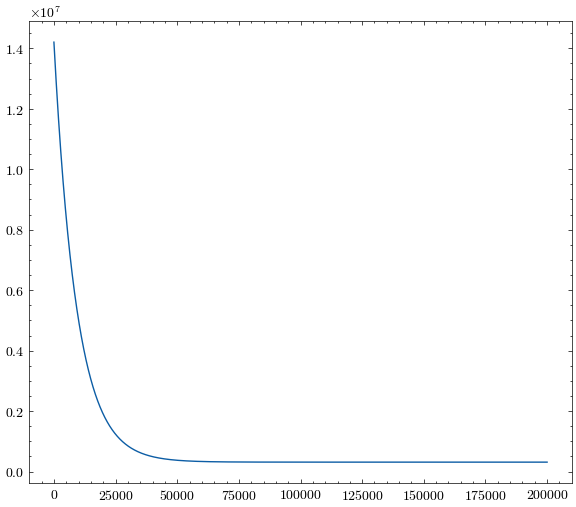

In [158]:
fig = plt.figure(figsize=(7, 6))
plt.plot(np.arange(100001, iterations, 1), cost[::-1][100000:iterations-1], color = 'black')
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Cost', fontsize = 14);
plt.show()
fig = plt.figure(figsize=(7, 6))
plt.plot(cost[::-1])

In [174]:
tp = 0

for i in range(len(w_h-1)):
    if i == 0:
        tp += w_h[i]
    else:
        tp += xh[i-1]*w_h[i]

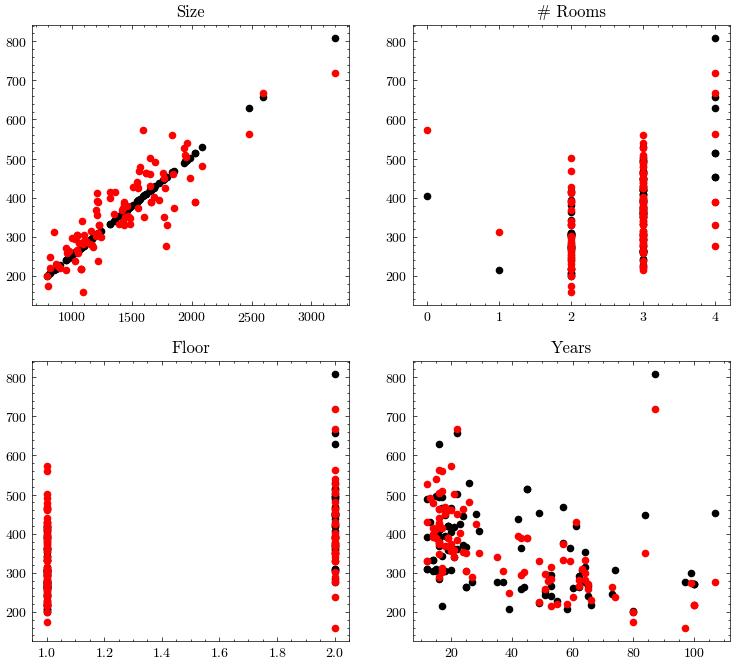

In [175]:
fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)

ax[0,0].scatter(xh[0], tp, s=20, color='black')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], tp, s=20, color='black')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], tp, s=20, color='black')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], tp, s=20, color='black')
ax[1,1].set_title('Years')

ax[0,0].scatter(xh[0], th, s=20, color='red')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], th, s=20, color='red')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], th, s=20, color='red')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], th, s=20, color='red')
ax[1,1].set_title('Years');

## Normalizando los datos

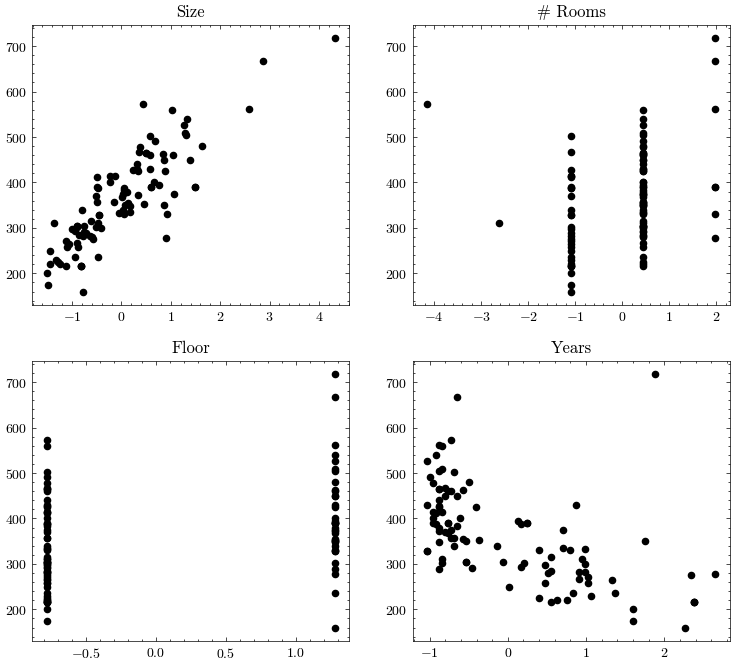

In [178]:
#Leemos los datos
data_houses = np.loadtxt('../Data/houses.txt', delimiter=',').T

xh = data_houses[0:4]
th = data_houses[-1]

#Normalizamos
for i in range(len(xh)):
    xh[i] = (xh[i] - np.mean(xh[i]))/np.std(xh[i])
    
    
fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)

ax[0,0].scatter(xh[0], th, s=20, color='black')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], th, s=20, color='black')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], th, s=20, color='black')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], th, s=20, color='black')
ax[1,1].set_title('Years');

Iteration 0  w:[0 0 0 0 0]
Iteration 20000  w:[362.23952    110.61335173 -21.47323884 -32.66070323 -37.77938362]
Iteration 40000  w:[362.23952    110.61335173 -21.47323884 -32.66070323 -37.77938362]
Iteration 60000  w:[362.23952    110.61335173 -21.47323884 -32.66070323 -37.77938362]
Iteration 80000  w:[362.23952    110.61335173 -21.47323884 -32.66070323 -37.77938362]


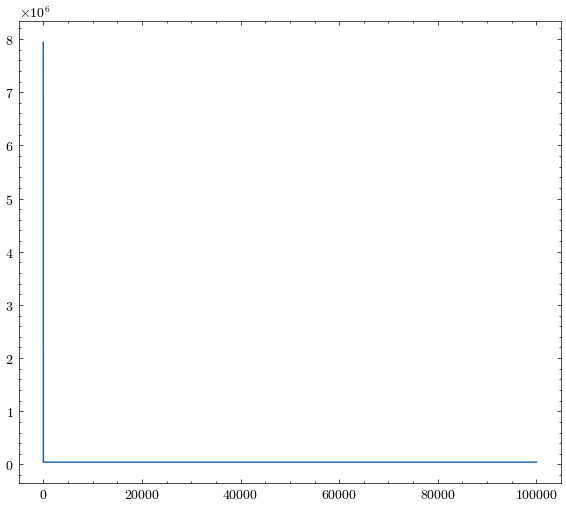

In [205]:
def gradiente_descendent(x, y, iterations, w0, learning_rate, tolerance):
     
    datax = [np.ones_like(xh[0]), xh[0], xh[1], xh[2], xh[3]]
    #Definimos la X, dependiendo del grado del polinomio
    X = np.vstack(datax).T
    #Definimos w.
    current_w = np.array(w0)
    cost_array = np.array([])
    
    for i in range(iterations):
        
        gradient = 1/(len(x))*(X.T @ X @ current_w) - 1/(len(x))*X.T@y
        
        #print(current_w)
        
        if (i%20000 == 0):
            print(f'Iteration {i}  w:{current_w}')
        
        
        # if np.all(np.abs(learning_rate*gradient) < tolerance):
        #     #Salimos del ciclo
        #     print(f'Convergio en {i} iteraciones. ')
        #     break
        
        #Actualizamos w
        current_w = current_w - learning_rate*gradient
        
        cost_array  = np.append(np.sum((X @ current_w - y)**2), cost_array)
    

    return cost_array, current_w


iterations = 100000
cost_norm, wh_norm = gradiente_descendent(xh, th, iterations, [0, 0, 0, 0, 0], 1e-2, 1e-11)
fig = plt.figure(figsize=(7, 6))
plt.plot(cost_norm[::-1]);

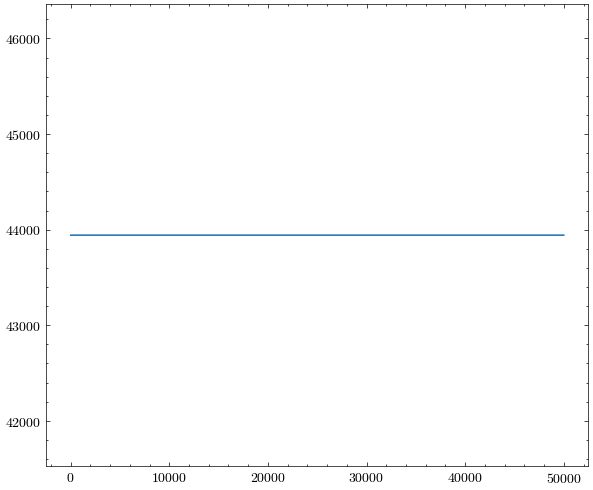

In [201]:
fig = plt.figure(figsize=(7, 6))

plt.plot(cost_norm[::-1][50000:])

In [203]:
tp_norm = 0

for i in range(len(w_h-1)):
    if i == 0:
        tp_norm += wh_norm[i]
    else:
        tp_norm += xh[i-1]*wh_norm[i]
        
tp_norm

array([248.65591798, 295.58045873, 485.81689524, 389.61035726,
       491.96762765, 420.52811442, 223.57450463, 523.31626324,
       267.84509755, 685.00447351, 182.66630919, 318.25079707,
       479.88048606, 409.96399029, 393.83650249, 287.69238564,
       323.97747981, 405.90878584, 436.31413687, 270.13705992,
       500.97979389, 329.10878125, 388.16122321, 552.41859037,
       242.3019055 , 295.69011978, 283.12331913, 217.52238166,
       491.06890089, 229.84738873, 341.18908562, 291.69315602,
       489.92233626, 239.03010489, 597.95447816, 384.07367102,
       452.70618447, 401.4470128 , 405.86539494, 173.12727791,
       423.54102555, 434.16299105, 277.3044564 , 229.84738873,
       448.56536512, 488.89226144, 332.01742952, 465.74081655,
       222.41425711, 386.76114193, 456.59466253, 370.7813079 ,
       469.12413346, 310.3417961 , 426.44966536, 392.08127297,
       347.54993532, 339.61307315, 471.54323795, 243.74234709,
       298.2466504 , 273.2843497 , 250.25244212, 297.97

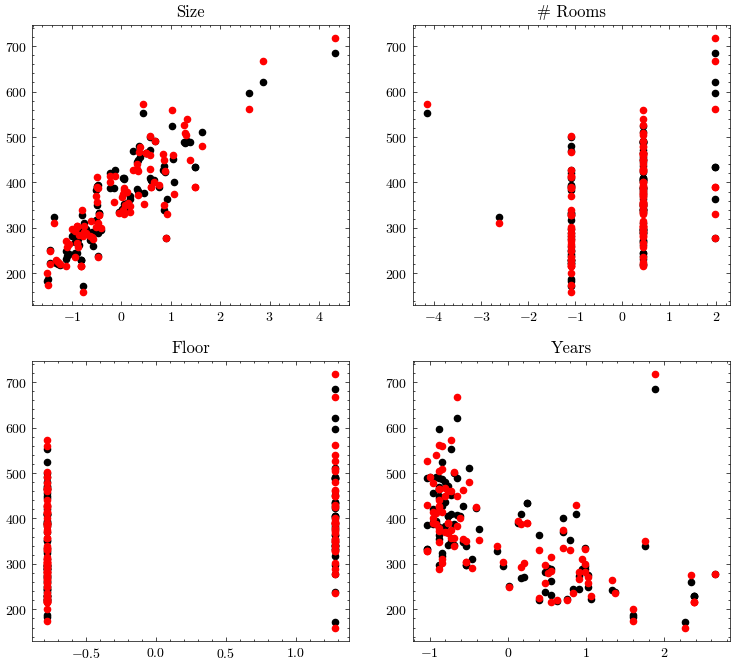

In [204]:
fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)


ax[0,0].scatter(xh[0], tp_norm, s=20, color='black')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], tp_norm, s=20, color='black')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], tp_norm, s=20, color='black')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], tp_norm, s=20, color='black')
ax[1,1].set_title('Years')

ax[0,0].scatter(xh[0], th, s=20, color='red')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], th, s=20, color='red')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], th, s=20, color='red')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], th, s=20, color='red')
ax[1,1].set_title('Years');

Text(0.5, 1.0, 'Years')

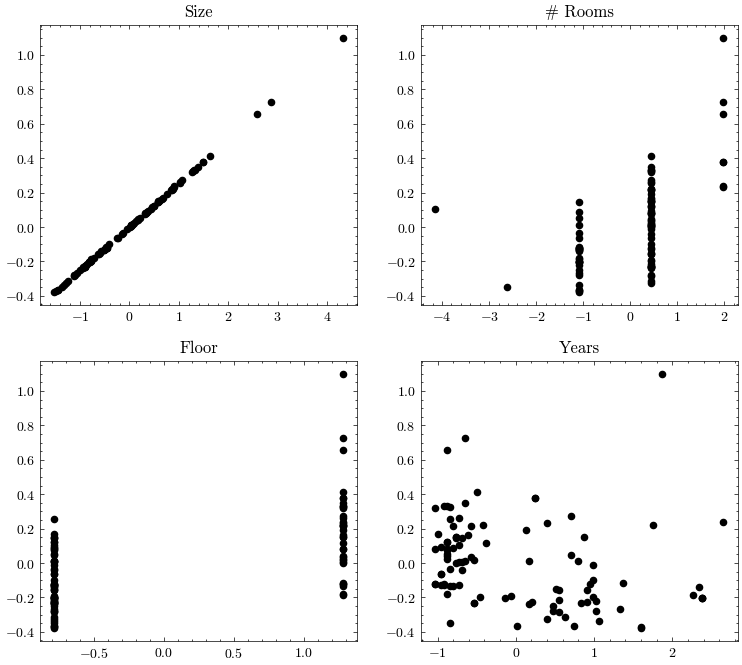

In [199]:
fig = plt.figure(figsize=(9, 8))
ax = fig.subplots(2,2)


ax[0,0].scatter(xh[0], tp_norm, s=20, color='black')
ax[0,0].set_title('Size')

ax[0,1].scatter(xh[1], tp_norm, s=20, color='black')
ax[0,1].set_title('# Rooms')

ax[1,0].scatter(xh[2], tp_norm, s=20, color='black')
ax[1,0].set_title('Floor')

ax[1,1].scatter(xh[3], tp_norm, s=20, color='black')
ax[1,1].set_title('Years')